## Module_2: 

## Team Members:
Angelina Leung,
Neil Shroff

## Project Title:
Predicting the extent of fibrosis in the lungs at different biopsy depths.



## Project Goal:
This project seeks to... *(what is the purpose of your project -- i.e., describe the question that you seek to answer by analyzing data.)*

## Disease Background: 
*Fill in information and please note that this module is truncated and only has 5 bullets (instead of the 11 that you did for Module #1).*

* Prevalence & incidence
* Risk factors (genetic, lifestyle)
* Symptoms
* Standard of care treatment(s)
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)

## Data-Set: 
*(Describe the data set(s) you will analyze. Cite the source(s) of the data. Describe how the data was collected -- What techniques were used? What units are the data measured in? Etc.)*

## Data Analyis: 
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

In [ ]:
'''Module 2: count black and white pixels in a .jpg and extrapolate points'''

from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_Sk658 Llobe ch010021.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_Sk658 Llobe ch010018.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_Sk658 Llobe ch010121.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_SK658 Slobe ch010087.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_SK658 Slobe ch010136.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_SK658 Slobe ch010156.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_Sk658 Llobe ch010026.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_SK658 Slobe ch010110.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_SK658 Slobe ch010126.jpg",
    r"/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_SK658 Slobe ch010129.jpg"
    ]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    30,
    90,
    9000,
    8000,
    9200,
    330,
    2800,
    5300,
    6800,
    3250
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

'''Write your data to a .csv file'''

# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents       
})

# Write that DataFrame to a .csv file

df.to_csv('Percent_White_Pixels.csv', index=False)

print("CSV file 'Percent_White_Pixels.csv' has been created.")

'''the .csv writing subroutine ends here'''



Counts of pixel by color in each image
White pixels in image 0: 23900
Black pixels in image 0: 4170404

White pixels in image 1: 33746
Black pixels in image 1: 4160558

White pixels in image 2: 161111
Black pixels in image 2: 4033193

White pixels in image 3: 155019
Black pixels in image 3: 4039285

White pixels in image 4: 163638
Black pixels in image 4: 4030666

White pixels in image 5: 38068
Black pixels in image 5: 4156236

Percent white px:
/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_Sk658 Llobe ch010021.jpg:
0.5698204040527344% White | Depth: 30 microns

/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_Sk658 Llobe ch010018.jpg:
0.8045673370361328% White | Depth: 90 microns

/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_Sk658 Llobe ch010121.jpg:
3.8411855697631836% White | Depth: 9000 microns

/Users/Angel/OneDrive/Desktop/IPF/Lung-Fibrosis-Project/MASK_SK658 Slobe ch010087.jpg:
3.6959409713745117% White | Depth: 8000 microns

/Users/Ang

'the .csv writing subroutine ends here'

The interpolated point is at the x-coordinate 4500.0 and y-coordinate 2.4235613187568594.


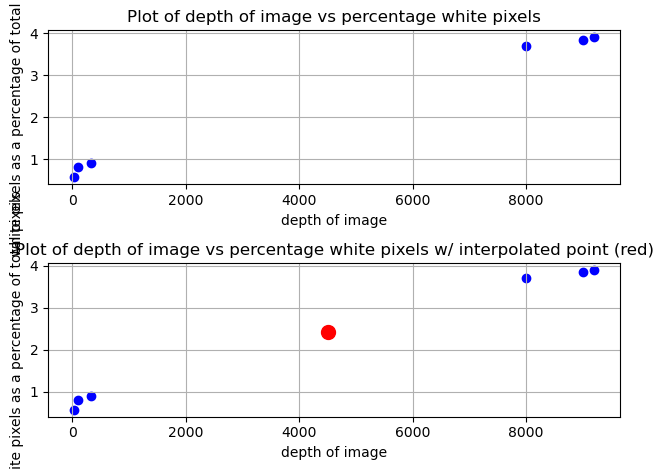

In [2]:
# Interpolate a point: given a depth, find the corresponding white pixel percentage

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='linear')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Verify and validate your analysis: 
*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*